In [42]:
import pandas as pd 
import random 
import os 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier

In [43]:
import matplotlib
from matplotlib import font_manager, rc


In [44]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [45]:
train = pd.read_csv('/dshome/WoongLab/heo/phone_classification/train.csv')
test = pd.read_csv('/dshome/WoongLab/heo/phone_classification/test.csv')

In [46]:
train.head(3)

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0


In [47]:
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [48]:
from sklearn.model_selection import train_test_split 


In [34]:
# 예측에 도움이 될 수 없는 ID 컬럼을 제거합니다.
# x_train은 독립변수이므로 종속변수를 제거합니다.
x_train = train.drop(['ID', '전화해지여부'], axis = 1)

# y_train은 종속변수의 값을 설정해줍니다.
y_train = train['전화해지여부']

# test 데이터에서 예측에 도움이 될 수 없는 ID 컬럼을 제거합니다.
test = test.drop('ID', axis = 1)

In [35]:
train_X,val_X,train_y,val_y=train_test_split(x_train,y_train,test_size=0.2,random_state=42,stratify=y_train)

In [36]:
model = DecisionTreeClassifier(random_state=42,max_depth=6) 
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [37]:
dt_feature_names = list(x_train.columns)
dt_target_names = [str(s) for s in y_train.unique()]

In [38]:
dt_feature_names

['가입일',
 '음성사서함이용',
 '주간통화시간',
 '주간통화횟수',
 '주간통화요금',
 '저녁통화시간',
 '저녁통화횟수',
 '저녁통화요금',
 '밤통화시간',
 '밤통화횟수',
 '밤통화요금',
 '상담전화건수']

In [39]:
dt_feature_names=['a','b','c','d','e','f','g','h','i','j','k','l']

findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Font family 'HYMyeongJo-Extra' not found.
findfont: Fo

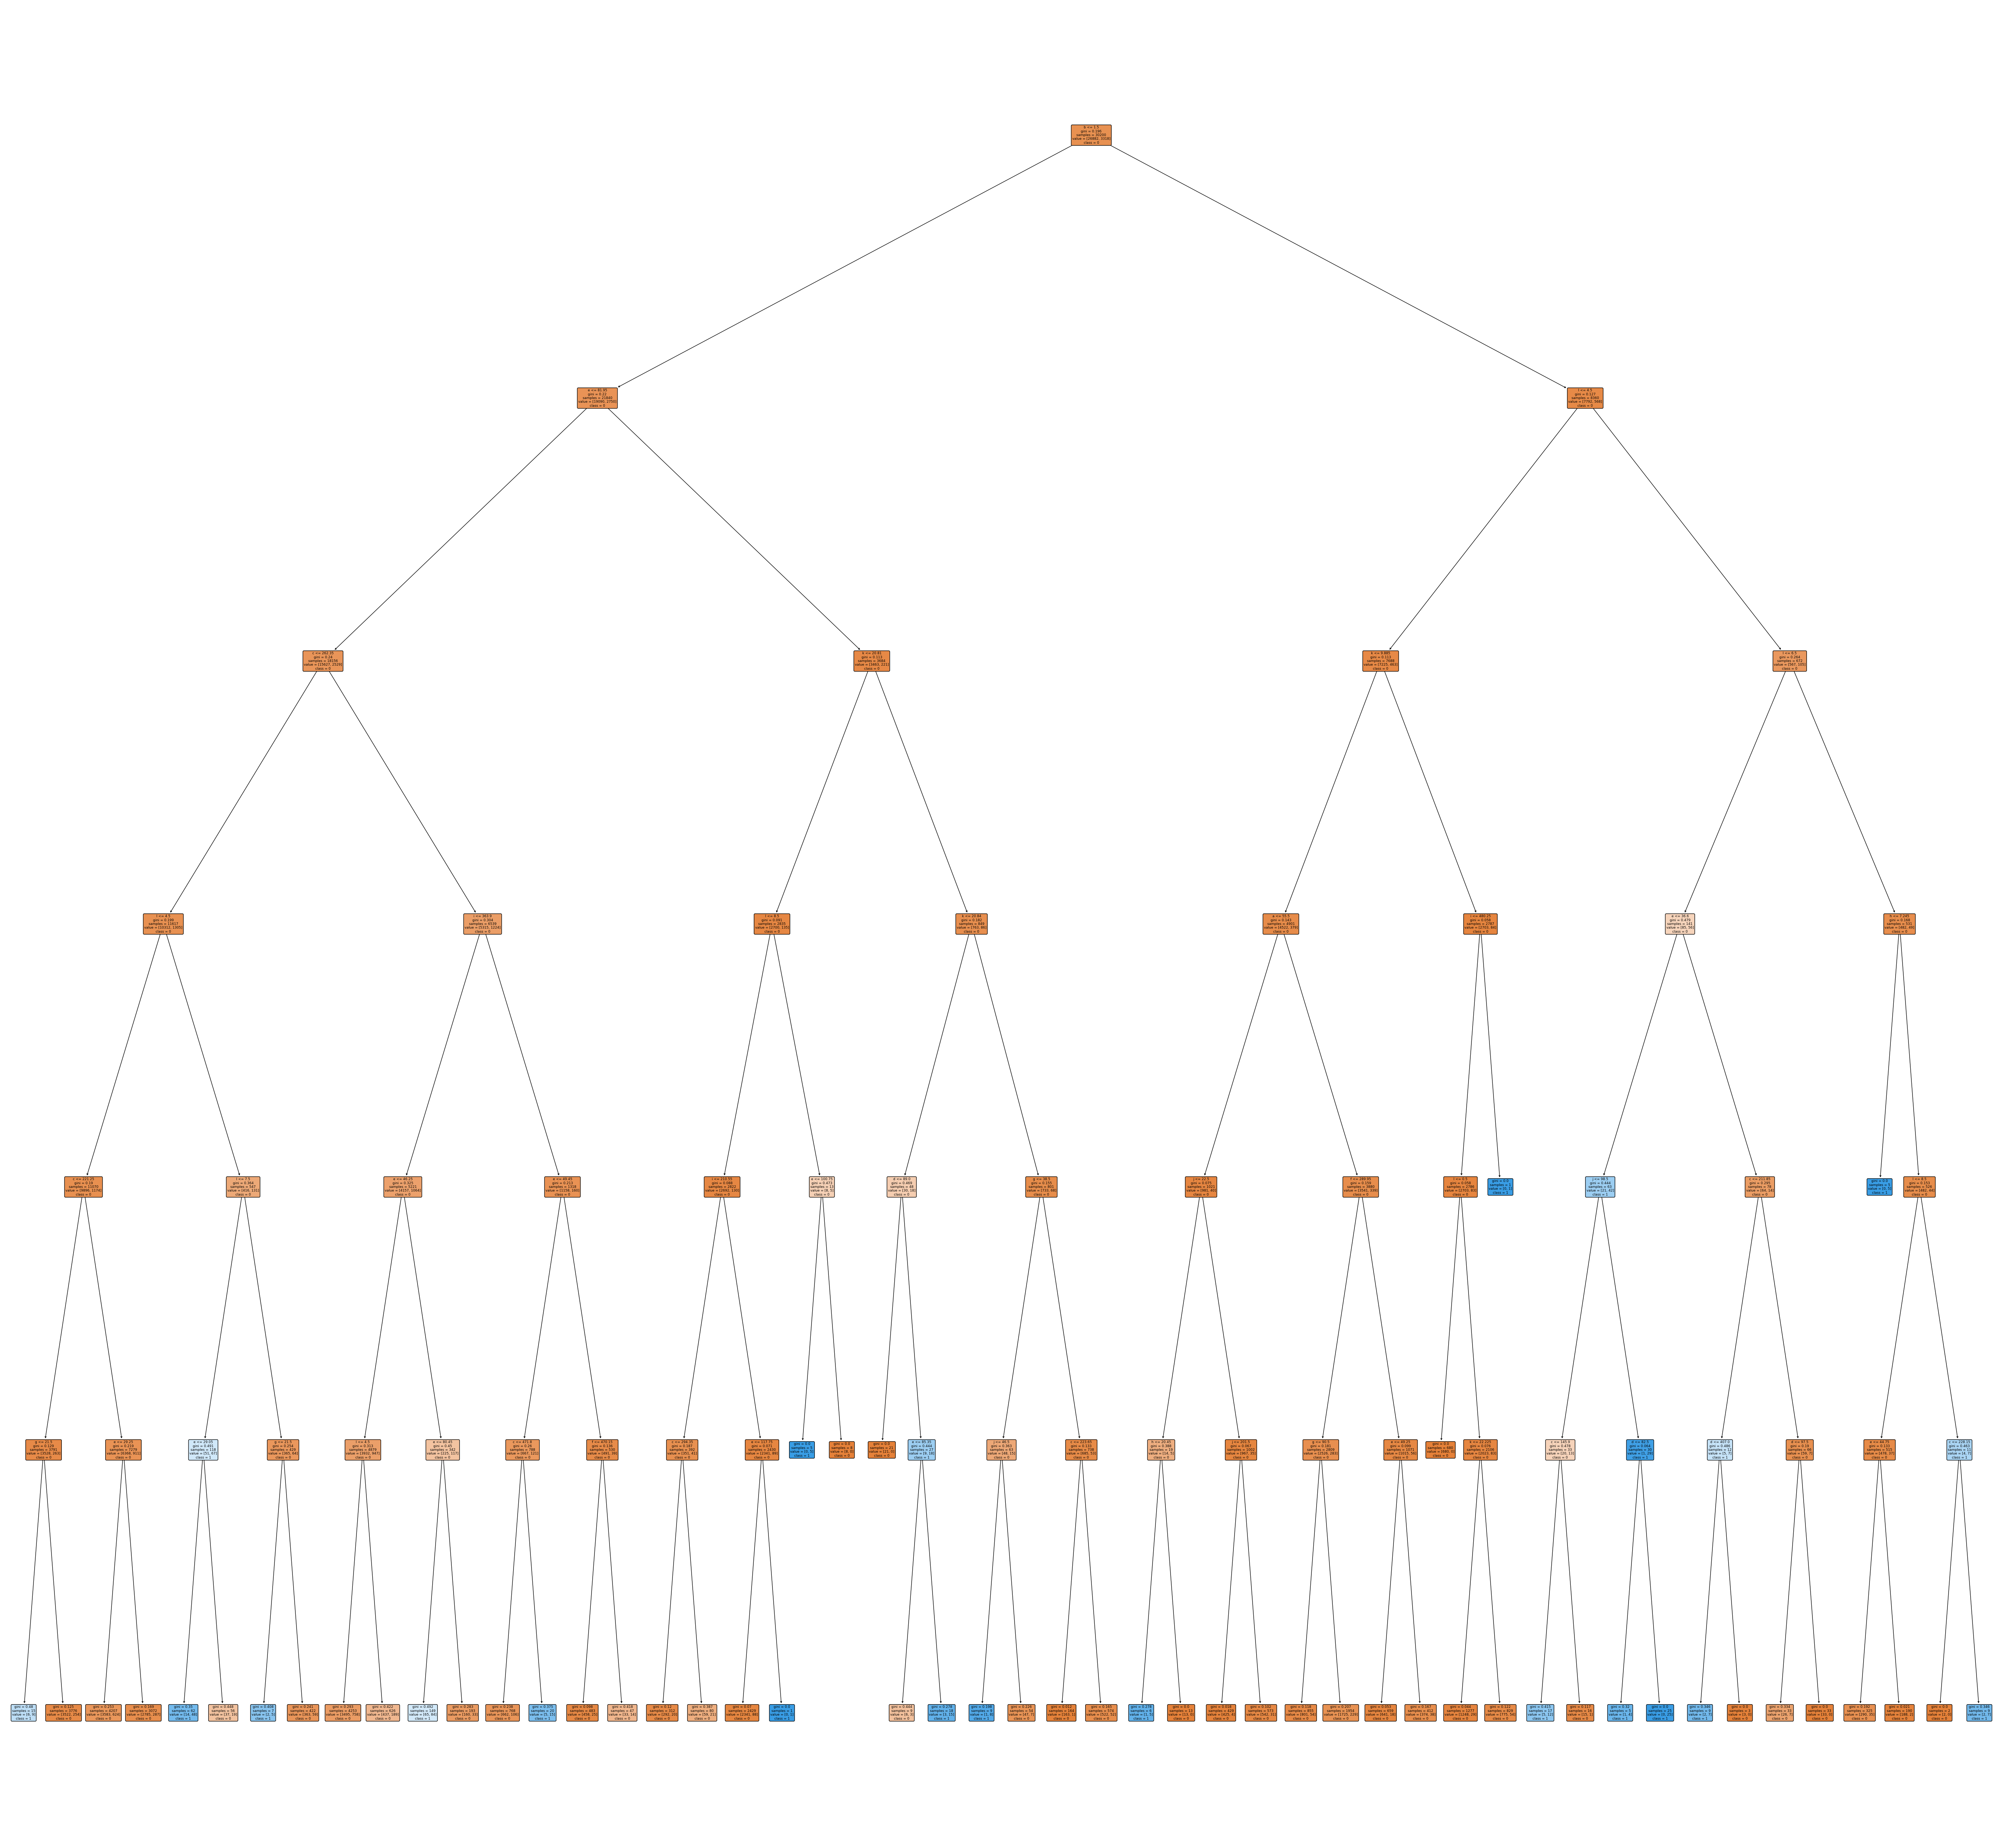

In [41]:
# 결정트리 규칙을 시각화
import matplotlib.pyplot as plt
from sklearn import tree
font_path='/dshome/WoongLab/H2MJRE.TTF'
font_name=font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.figure( figsize=(70,65) )
tree.plot_tree(model, 
               class_names=['0','1'],
               feature_names=dt_feature_names,
               impurity=True, filled=True,
               rounded=True)
matplotlib.rc('font',family=font_name)

In [49]:
train.columns=['ID','a','b','c','d','e','f','g','h','i','j','k','l','name']
test.columns=['ID','a','b','c','d','e','f','g','h','i','j','k','l']

In [50]:
train

,ID,a,b,c,d,e,f,g,h,i,j,k,l,name
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [51]:
train['name'][(train['b']<=1.5) & (train['l']>=6.5) & (train['h']<=7.245)]=1

/tmp/ipykernel_546578/866529360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name'][(train['b']<=1.5) & (train['l']>=6.5) & (train['h']<=7.245)]=1


In [52]:
train['name'][(train['b']<=1.5) & (train['e']>=81.95) & (train['k']>=20.84) & (train['g']<=38.5) & (train['j']<=46.5)]=1
train['name'][(train['b']>=1.5) & (train['l']>=4.5) & (train['l']<=6.5) & (train['e']<=36.6) & (train['j']>=98.5)]=1

/tmp/ipykernel_546578/1123004694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name'][(train['b']<=1.5) & (train['e']>=81.95) & (train['k']>=20.84) & (train['g']<=38.5) & (train['j']<=46.5)]=1
/tmp/ipykernel_546578/1123004694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name'][(train['b']>=1.5) & (train['l']>=4.5) & (train['l']<=6.5) & (train['e']<=36.6) & (train['j']>=98.5)]=1


In [53]:
train['name'].value_counts()

0    26840
1     3360
Name: name, dtype: int64

In [54]:
# 예측에 도움이 될 수 없는 ID 컬럼을 제거합니다.
# x_train은 독립변수이므로 종속변수를 제거합니다.
x_train = train.drop(['ID', 'name'], axis = 1)

# y_train은 종속변수의 값을 설정해줍니다.
y_train = train['name']

# test 데이터에서 예측에 도움이 될 수 없는 ID 컬럼을 제거합니다.
test = test.drop('ID', axis = 1)

In [55]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y=train_test_split(x_train,y_train,test_size=0.2,random_state=42,stratify=y_train)

In [56]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(train_y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_y)
class_weights = dict(zip(classes, weights))

In [85]:

from catboost import CatBoostClassifier
model = CatBoostClassifier(learning_rate=0.1,max_depth=8,class_weights= class_weights,random_state = 42)

In [80]:
model.fit(train_X,train_y,eval_set=(val_X,val_y),verbose=1)

0:	learn: 0.6814562	test: 0.6824818	best: 0.6824818 (0)	total: 20.1ms	remaining: 20.1s
1:	learn: 0.6682108	test: 0.6700887	best: 0.6700887 (1)	total: 33.3ms	remaining: 16.6s
2:	learn: 0.6559316	test: 0.6601403	best: 0.6601403 (2)	total: 45.9ms	remaining: 15.3s
3:	learn: 0.6455107	test: 0.6511386	best: 0.6511386 (3)	total: 59.5ms	remaining: 14.8s
4:	learn: 0.6348900	test: 0.6417286	best: 0.6417286 (4)	total: 72.9ms	remaining: 14.5s
5:	learn: 0.6258334	test: 0.6345952	best: 0.6345952 (5)	total: 86.2ms	remaining: 14.3s
6:	learn: 0.6175737	test: 0.6277529	best: 0.6277529 (6)	total: 99ms	remaining: 14s
7:	learn: 0.6124995	test: 0.6239445	best: 0.6239445 (7)	total: 111ms	remaining: 13.8s
8:	learn: 0.6066164	test: 0.6193800	best: 0.6193800 (8)	total: 123ms	remaining: 13.6s
9:	learn: 0.6007578	test: 0.6150952	best: 0.6150952 (9)	total: 135ms	remaining: 13.4s
10:	learn: 0.5959361	test: 0.6107947	best: 0.6107947 (10)	total: 148ms	remaining: 13.3s
11:	learn: 0.5909055	test: 0.6076526	best: 0.6076

In [81]:
train_pred=model.predict(train_X)
val_pred=model.predict(val_X)

In [82]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    # F1 스코어 추가
    f1=f1_score(y_test,pred,average='macro')
    AUC_score=roc_auc_score(y_test,pred)
    print('임계값: ', 0.5) 
    print('오차행렬')
    print(confusion) 
    #f1 score print 추가 
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,AUC_score))

In [83]:
get_clf_eval(train_y,train_pred)

임계값:  0.5
오차행렬
[[20624   848]
 [    3  2685]]
정확도: 0.9648, 정밀도: 0.7600, 재현율: 0.9989, F1:0.9215, AUC:0.9797


In [84]:
get_clf_eval(val_y,val_pred)

임계값:  0.5
오차행렬
[[5051  317]
 [ 155  517]]
정확도: 0.9219, 정밀도: 0.6199, 재현율: 0.7693, F1:0.8210, AUC:0.8551


In [86]:
model.fit(x_train,y_train,verbose=1)

0:	learn: 0.6795887	total: 19.7ms	remaining: 19.7s
1:	learn: 0.6688332	total: 32.9ms	remaining: 16.4s
2:	learn: 0.6580766	total: 45.2ms	remaining: 15s
3:	learn: 0.6475075	total: 58ms	remaining: 14.5s
4:	learn: 0.6387714	total: 71ms	remaining: 14.1s
5:	learn: 0.6299701	total: 84.4ms	remaining: 14s
6:	learn: 0.6239503	total: 97.2ms	remaining: 13.8s
7:	learn: 0.6137079	total: 111ms	remaining: 13.8s
8:	learn: 0.6080163	total: 124ms	remaining: 13.7s
9:	learn: 0.6033439	total: 137ms	remaining: 13.6s
10:	learn: 0.5979059	total: 150ms	remaining: 13.5s
11:	learn: 0.5933699	total: 163ms	remaining: 13.4s
12:	learn: 0.5901353	total: 175ms	remaining: 13.3s
13:	learn: 0.5834650	total: 188ms	remaining: 13.3s
14:	learn: 0.5795010	total: 201ms	remaining: 13.2s
15:	learn: 0.5732617	total: 214ms	remaining: 13.2s
16:	learn: 0.5700857	total: 227ms	remaining: 13.1s
17:	learn: 0.5652721	total: 241ms	remaining: 13.2s
18:	learn: 0.5629436	total: 253ms	remaining: 13.1s
19:	learn: 0.5592319	total: 266ms	remainin

In [87]:
pred = model.predict(test)

In [88]:
submit=pd.read_csv('/dshome/WoongLab/heo/phone_classification/sample_submission.csv')


In [89]:
submit['전화해지여부']=pred  
submit.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,1
4,TEST_00004,1


In [90]:
submit.to_csv('/dshome/WoongLab/heo/phone_classification/submit2.csv',index=False)